# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset


'/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset'

# LAB1

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['adult.csv']


# **Подключите необходимые библиотеки.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)});

# **Загрузите данные. Они находятся в директории input.**

In [5]:
df = pd.read_csv('adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# **Визуализируйте распределение значений возраста для лиц, зарабатывающих > 50K и < 50K. Найдите среднее и стандартное отклонение возраста в каждой из групп.**

In [9]:
# Your code
df.groupby('income')['age'].mean()

income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64

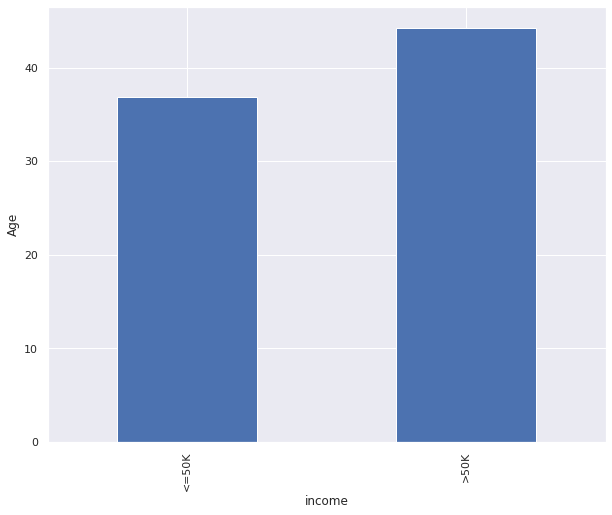

In [10]:
df.groupby('income')['age'].mean().plot(kind='bar')
plt.ylabel('Age')  # добавляем подпись на оси Оу
plt.show()

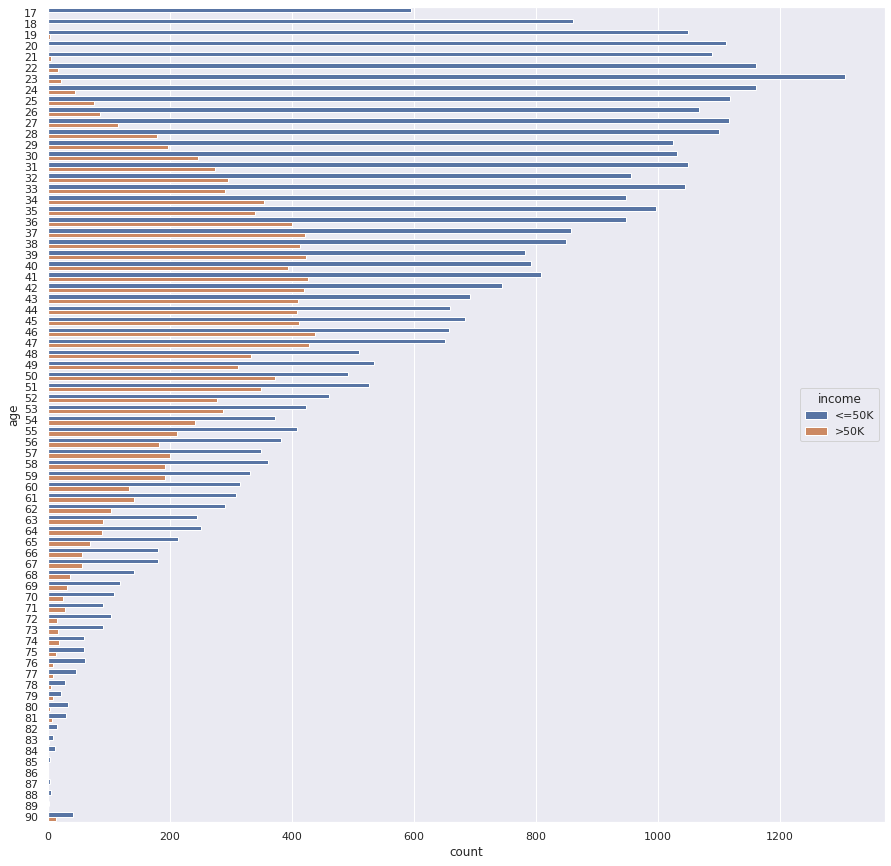

In [12]:
plt.figure(figsize=(15, 15))  # увеличим размер картинки
sns.countplot(y='age', hue='income', data=df)
plt.show()

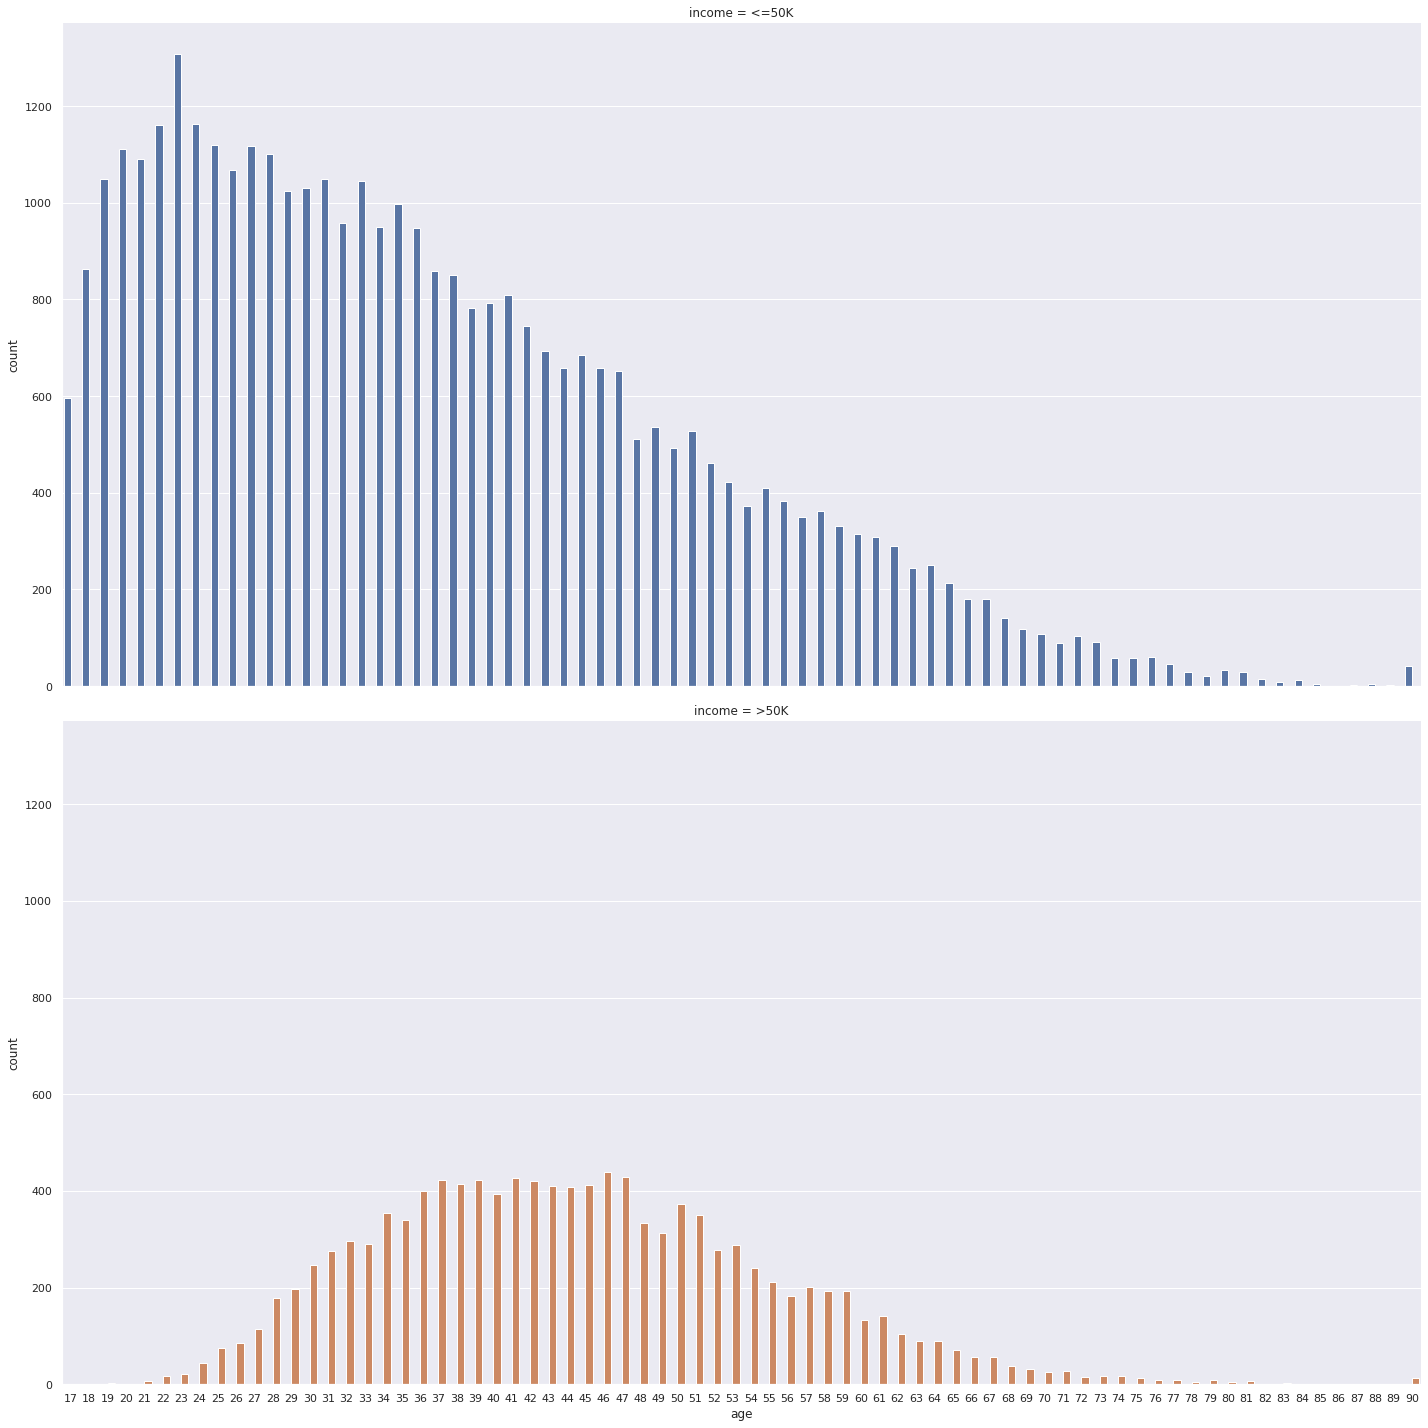

In [13]:
sns.catplot(x='age', hue='income', col='income', data=df, kind="count", height=10, aspect=2, col_wrap=1);

In [14]:
df[['age', 'income']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0


In [15]:
df[(df['income'] == '<=50K')]['age'].describe().T

count    37155.000000
mean        36.872184
std         14.104118
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [16]:
df.loc[(df['income'] == '>50K'), 'age'].to_frame().describe().T

,count,mean,std,min,25%,50%,75%,max
age,11687.0,44.275178,10.558983,19.0,36.0,43.0,51.0,90.0


* Среднее возраста в группе, которая зарабатывает больше 50К составляет 44 года.
* Стандартное отклонение возраста в группе, которая зарабатывает больше 50К составляет 10.5.

In [17]:
df.loc[(df['income'] == '<=50K'), 'age'].to_frame().describe().T

,count,mean,std,min,25%,50%,75%,max
age,37155.0,36.872184,14.104118,17.0,25.0,34.0,46.0,90.0


Среднее отклонение возраста в группе, которая зарабатывает меньше 50К составляет 36.872184.
Стандартное отклонение возраста в группе, которая зарабатывает меньше 50К составляет 14.104118.

# **Верно ли, что люди, зарабатывающие > 50K имеют как минимум полное среднее образование (значения **education** --- Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)? **

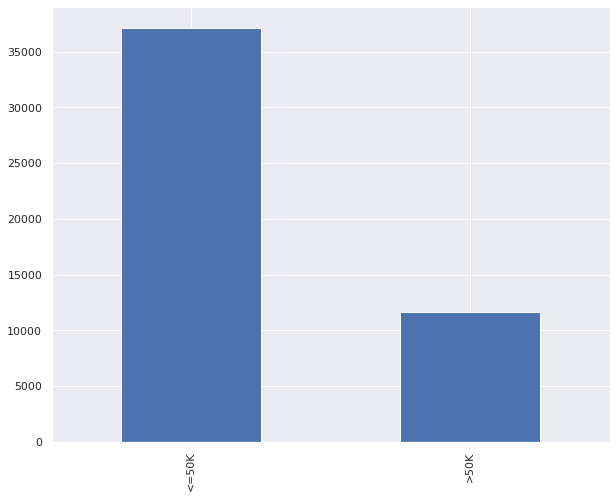

In [18]:
# Your code
sort_50k = df['income'].value_counts()
sort_50k.plot(kind='bar')
plt.show()

In [19]:
sort_50k['>50K']

11687

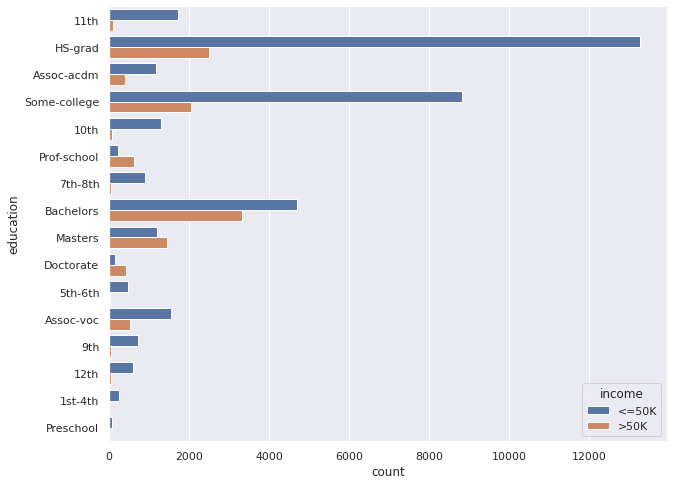

In [20]:
sns.countplot(y='education', hue="income", data=df)

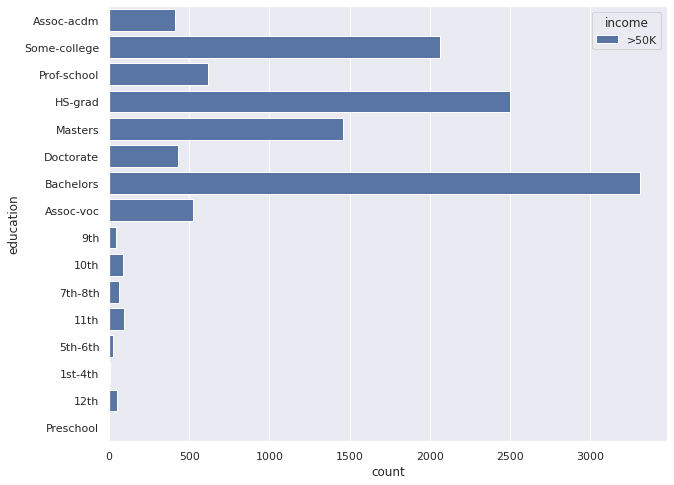

In [21]:
sns.countplot(y='education', hue='income', data=df[df['income']==">50K"])
plt.show()

Исходя их графика выше, можем утвержадть, что люди, зарабатывающие > 50K имеют как минимум полное среднее образование (в большинстве).

# **Какие мужчины зарабаывают в среднем больше --- женатые или холостые?**

In [22]:
# Your code
print(df.loc[df.gender == "Male", ['gender', 'marital-status']])

      gender      marital-status
0       Male       Never-married
1       Male  Married-civ-spouse
2       Male  Married-civ-spouse
3       Male  Married-civ-spouse
5       Male       Never-married
...      ...                 ...
48834   Male       Never-married
48835   Male  Married-civ-spouse
48836   Male       Never-married
48838   Male  Married-civ-spouse
48840   Male       Never-married

[32650 rows x 2 columns]


In [23]:
print(df.loc[(df['gender'] == "Male") & (df['income'] == ">50K"), 'marital-status'])

2        Married-civ-spouse
3        Married-civ-spouse
7        Married-civ-spouse
10       Married-civ-spouse
14       Married-civ-spouse
                ...        
48813    Married-civ-spouse
48814    Married-civ-spouse
48820    Married-civ-spouse
48835    Married-civ-spouse
48838    Married-civ-spouse
Name: marital-status, Length: 9918, dtype: object


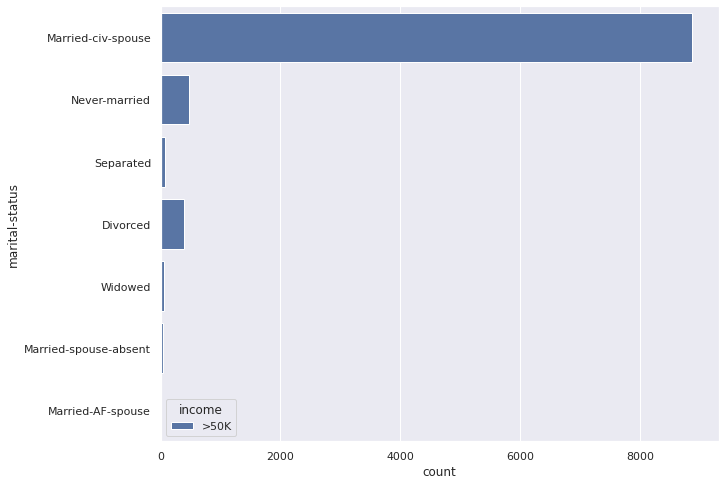

In [24]:
sns.countplot(y='marital-status', hue='income', data=df.loc[(df['gender'] == "Male") & (df['income'] == ">50K")])
plt.show()

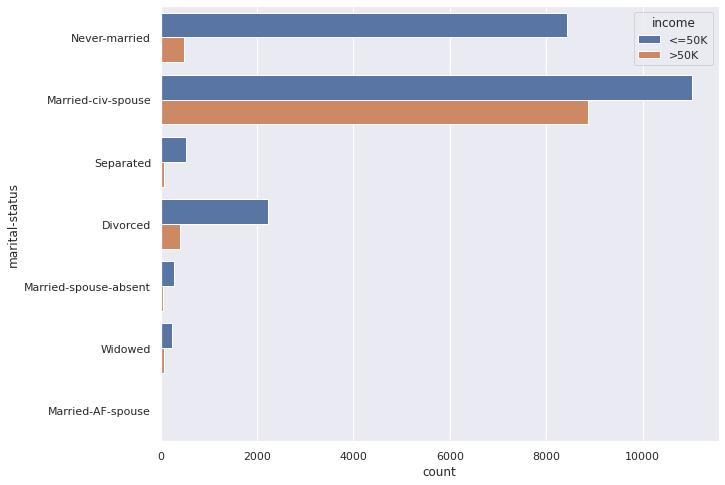

In [25]:
sns.countplot(y='marital-status', hue='income', data=df.loc[(df['gender'] == "Male")])
plt.show()

Исходя их полученного графика, женатые мужчины зарабатывают больше, чем холостые.

# **Каково максимальное количество рабочих часов в неделю? Сколько людей работают такое количество времени и каков среди них процент тех, кто зарабатывает много?**

In [26]:
# Your code
print(df['hours-per-week'].max())

99


Максимальное количество рабочих часов в неделю: 99 часов.

In [27]:
print(df.loc[(df['hours-per-week'] == 99)])

       age         workclass  fnlwgt  ... hours-per-week  native-country income
384     29           Private  211208  ...             99   United-States   >50K
901     37           Private  112158  ...             99   United-States   >50K
1121    31         Local-gov  378426  ...             99        Columbia  <=50K
1156    48                 ?  117054  ...             99   United-States  <=50K
1649    52           Private  254680  ...             99   United-States  <=50K
...    ...               ...     ...  ...            ...             ...    ...
47273   40      Self-emp-inc  104235  ...             99   United-States  <=50K
47962   43           Private  266324  ...             99   United-States   >50K
47980   43  Self-emp-not-inc  163108  ...             99   United-States  <=50K
48750   58      Self-emp-inc  181974  ...             99               ?  <=50K
48812   30                 ?   33811  ...             99   United-States  <=50K

[137 rows x 15 columns]


In [28]:
len(df.loc[(df['hours-per-week'] == 99)])

137

137 человек работают 99 часов в неделю.

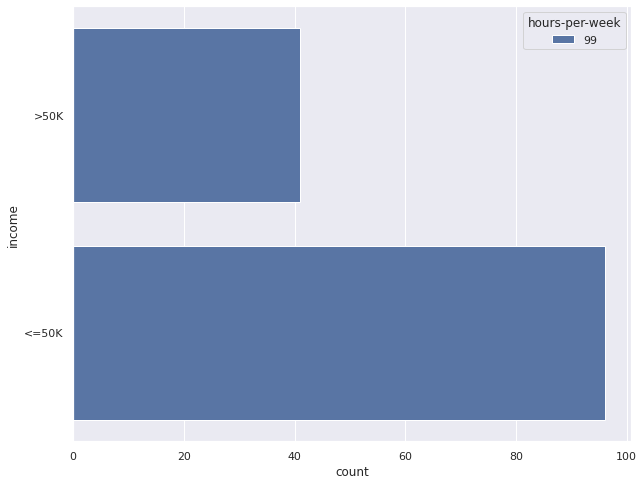

In [29]:
sns.countplot(y='income', hue='hours-per-week', data=df.loc[(df['hours-per-week'] == 99) ])
plt.show()

In [30]:
print(df.loc[(df['hours-per-week'] == 99), 'income'].value_counts(normalize=True))

<=50K    0.70073
>50K     0.29927
Name: income, dtype: float64


Процент среди тех, кто работает 99 часов в неделю и зарабатывает много - 29,927.

# **Что можно сказать о корреляции между количеством рабочих часов и зарплатой? Является ли она статистически значимой?**

In [31]:
# Your code
print(pd.crosstab(df['income'], df['hours-per-week']))

hours-per-week  1   2   3   4   5   6   7    8   ...  91  92  94  95  96  97  98  99
income                                           ...                                
<=50K           24  41  56  78  86  82  38  199  ...   3   2   1   1   8   1  11  96
>50K             3  12   3   6   9  10   7   19  ...   0   1   0   1   1   1   3  41

[2 rows x 96 columns]


In [32]:
pd.set_option('display.max_columns', None)
df.groupby(['income', 'hours-per-week']).size().unstack(fill_value=0).T.sort_values(by='<=50K', ascending=False).T

hours-per-week,40,50,20,45,35,30,60,25,15,38,55,48,10,32,24,70,16,36,42,12,65,37,44,8,43,52,28,80,18,99,5,56,46,6,4,75,72,22,33,3,47,14,39,84,41,34,2,27,21,54,17,23,7,26,49,53,58,13,90,9,1,11,66,19,62,64,51,29,57,98,85,31,68,63,78,77,96,88,59,81,91,92,67,73,86,76,97,95,94,89,79,87,74,61,82,69
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,17953,2345,1750,1710,1653,1584,1223,909,593,584,561,521,392,380,320,282,281,280,237,231,211,207,203,199,167,136,131,127,121,96,86,86,84,82,78,69,69,58,56,56,55,53,53,47,44,44,41,41,41,41,39,39,38,36,32,31,26,25,25,24,24,20,20,19,18,16,16,14,11,11,11,10,10,10,10,9,8,4,4,3,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0
>50K,4850,1901,112,1007,284,116,954,49,30,130,490,249,33,43,34,155,22,56,101,16,144,35,107,19,60,69,9,83,8,41,9,55,45,10,6,36,38,4,5,3,27,2,10,25,15,4,12,2,5,21,3,1,7,4,7,8,12,3,17,3,3,0,3,0,5,6,4,1,8,3,6,2,6,5,3,0,1,0,3,0,0,1,4,2,2,3,1,1,0,2,0,0,2,3,0,1


In [33]:
df['hours-per-week'].value_counts().to_frame().T

,40,50,45,60,35,20,30,55,25,48,38,15,70,10,32,65,24,42,36,44,16,12,37,43,8,80,52,56,28,99,18,46,72,75,5,6,4,47,84,39,22,54,33,41,3,14,2,34,21,7,27,17,90,26,23,53,49,58,13,1,9,62,66,64,11,51,19,57,85,68,63,29,98,78,31,96,77,59,67,76,61,73,86,88,74,92,81,91,89,97,95,69,94,79,82,87
hours-per-week,22803,4246,2717,2177,1937,1862,1700,1051,958,770,714,623,437,425,423,355,354,338,336,310,303,247,242,227,218,210,205,141,140,137,129,129,107,105,95,92,84,82,72,63,62,62,61,59,59,55,53,48,46,45,43,42,42,40,40,39,39,38,28,27,27,23,23,22,20,20,19,19,17,16,15,15,14,13,12,9,9,7,6,4,4,4,4,4,3,3,3,3,3,2,2,1,1,1,1,1


**ЗАДАТЬ ВОПРОС: не выходит сделать сортировку по времни относительно заработка**

In [34]:
df.loc[(df['hours-per-week'].value_counts()), ['income','hours-per-week']].T

,22803,4246,2717,2177,1937,1862,1700,1051,958,770,714,623,437,425,423,355,354,338,336,310,303,247,242,227,218,210,205,141,140,137,129,129,107,105,95,92,84,82,72,63,62,62,61,59,59,55,53,48,46,45,43,42,42,40,40,39,39,38,28,27,27,23,23,22,20,20,19,19,17,16,15,15,14,13,12,9,9,7,6,4,4,4,4,4,3,3,3,3,3,2,2,1,1,1,1,1
income,<=50K,<=50K,<=50K,<=50K,>50K,>50K,<=50K,>50K,>50K,<=50K,>50K,<=50K,<=50K,>50K,<=50K,>50K,>50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,>50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,>50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,>50K,>50K,>50K,<=50K,<=50K,>50K,>50K,>50K,<=50K,<=50K,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K
hours-per-week,40,50,40,42,40,40,30,65,40,21,50,40,5,40,45,50,84,80,55,45,40,40,12,40,40,12,54,22,40,40,50,50,40,40,40,10,50,40,40,40,40,40,40,40,40,40,60,18,40,36,40,40,40,50,50,40,40,40,35,54,54,43,43,6,47,47,45,45,30,25,50,50,48,35,39,10,10,32,40,30,30,30,30,30,40,40,40,40,40,40,40,50,50,50,50,50


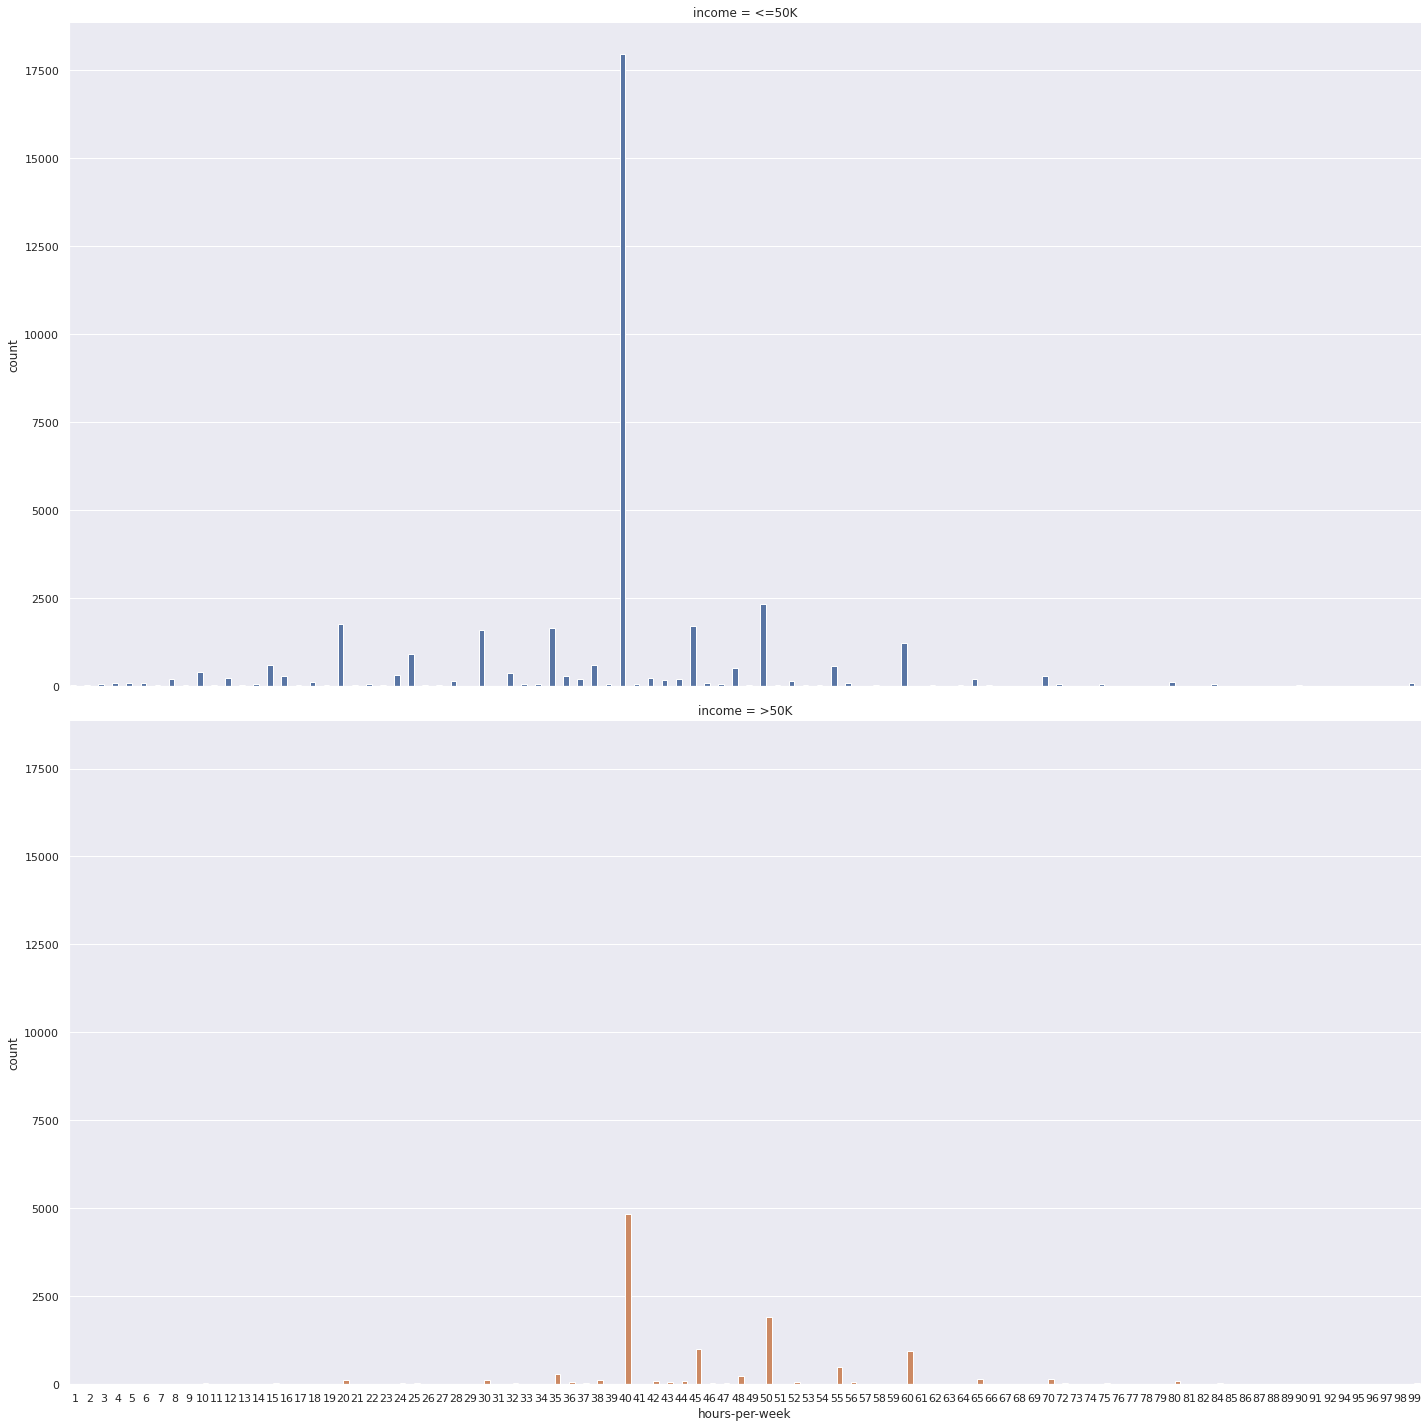

In [35]:
sns.catplot(x='hours-per-week', hue='income', col='income', data=df, kind="count", height=10, aspect=2, col_wrap=1);

In [36]:
new_values = {'<=50K':0, ">50K":1} # обычный словарь Python
df['dummy_income'] = df['income'].map(new_values)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,dummy_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [37]:
from scipy.stats import pointbiserialr
pointbiserialr(df['dummy_income'], df['hours-per-week'])

PointbiserialrResult(correlation=0.22768676056081386, pvalue=0.0)

Так как p-value < 0.05 (типичное пороговое значение), то делаем вывод о том, что взаимосвязь (корреляция) между количеством рабочих часов и зарплатой статистически значима.

# **Как связан уровень образования и количество рабочих часов? Не забывайте о визуализации информации.**

In [38]:
print(pd.crosstab(df['education'], df['hours-per-week']))

hours-per-week  1   2   3   4   5   6   7   8   9    10  11  12  13  14   15  \
education                                                                      
10th             3   2   1   5   5   6   1  10   0   26   2  22   0   4   40   
11th             1   2   5   6  11   8   8  24   5   31   0  36   3   4   85   
12th             0   0   0   1   0   3   2   5   1   12   1  11   0   1   15   
1st-4th          0   0   0   1   1   0   0   0   0    1   0   2   0   0    5   
5th-6th          0   0   1   1   0   3   0   4   0    7   0   3   0   1    6   
7th-8th          0   4   3   3   5   3   2   6   0   23   0   5   0   2   13   
9th              1   1   0   1   4   3   0   1   3    6   1   4   2   0   10   
Assoc-acdm       1   5   6   3   5   3   2   4   1    5   0   5   4   0   17   
Assoc-voc        3   1   3   1   4   1   1   6   1   10   0   3   1   1   14   
Bachelors        3   5   8  12  15  14  15  34   2   48   0  18   4   3   66   
Doctorate        1   2   1   1   2   2  

In [39]:
df.groupby(['education', 'hours-per-week']).size().unstack(fill_value=0)

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10th,3,2,1,5,5,6,1,10,0,26,2,22,0,4,40,15,2,7,0,72,1,2,2,15,38,1,3,5,1,79,1,13,2,2,63,12,4,22,2,654,1,4,4,4,49,1,2,16,1,58,0,2,0,0,11,5,0,1,0,32,0,0,0,2,8,0,0,1,0,18,0,0,0,3,0,0,0,0,9,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,8
11th,1,2,5,6,11,8,8,24,5,31,0,36,3,4,85,39,6,14,4,176,3,6,7,19,61,2,3,6,1,90,1,20,1,2,69,16,6,9,4,751,1,10,6,4,41,2,4,15,5,62,1,5,2,1,15,3,0,2,1,46,0,0,0,0,12,0,0,0,0,13,2,0,0,3,1,0,0,0,2,0,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,3
12th,0,0,0,1,0,3,2,5,1,12,1,11,0,1,15,10,2,10,0,57,2,1,1,7,23,0,1,1,0,39,0,8,1,1,28,3,2,4,1,300,0,3,2,3,21,1,1,9,0,25,1,3,1,1,10,2,0,0,1,11,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1st-4th,0,0,0,1,1,0,0,0,0,1,0,2,0,0,5,1,0,2,0,13,2,1,0,3,5,0,0,2,0,10,0,2,0,2,15,2,1,2,0,126,0,0,2,1,11,0,0,2,0,8,0,2,2,1,4,1,0,0,0,3,0,0,0,0,2,2,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5th-6th,0,0,1,1,0,3,0,4,0,7,0,3,0,1,6,1,0,0,1,17,1,1,0,2,11,0,0,0,0,15,0,10,1,1,20,7,4,3,0,302,0,1,0,3,16,0,0,8,1,19,1,4,0,3,6,4,0,0,1,6,0,0,0,0,1,0,1,0,0,3,1,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7th-8th,0,4,3,3,5,3,2,6,0,23,0,5,0,2,13,4,0,1,2,43,3,0,1,9,19,1,1,1,1,42,2,9,2,0,50,9,0,14,0,455,2,4,1,6,34,0,2,23,1,52,0,3,1,1,10,4,0,1,0,27,0,0,1,1,2,1,0,0,0,8,4,0,0,6,0,0,1,0,6,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,10
9th,1,1,0,1,4,3,0,1,3,6,1,4,2,0,10,10,0,1,0,28,1,2,2,10,17,1,1,2,0,25,0,11,1,1,36,3,7,11,2,393,1,5,5,5,34,2,1,12,2,44,0,2,0,3,7,2,0,3,0,9,0,0,0,0,3,0,1,0,0,6,0,0,0,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Assoc-acdm,1,5,6,3,5,3,2,4,1,5,0,5,4,0,17,7,0,3,0,56,3,1,0,6,35,1,2,1,0,51,2,22,2,0,59,22,10,29,1,710,1,19,9,14,120,7,3,22,1,141,0,9,1,1,36,10,1,1,1,70,0,1,0,0,8,1,1,1,0,11,3,0,0,4,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6
Assoc-voc,3,1,3,1,4,1,1,6,1,10,0,3,1,1,14,4,0,3,0,44,0,1,3,12,18,2,1,3,0,53,0,22,2,2,58,38,7,41,3,1086,3,26,13,21,108,8,1,46,2,157,1,9,3,5,38,13,1,0,0,84,0,1,2,3,15,0,0,0,0,14,2,0,0,6,2,0,0,0,9,0,0,4,0,0,0,1,0,2,0,0,0,0,0,0,2,6


In [40]:
df['education'].value_counts().to_frame().T

,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
education,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83


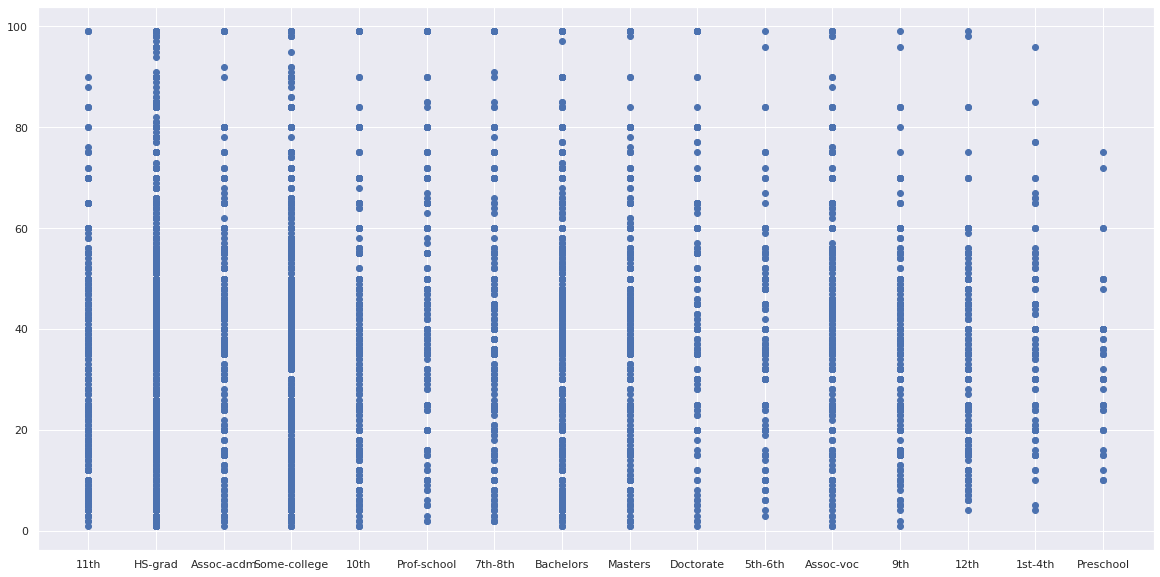

In [41]:
# Your code
plt.figure(figsize=(20, 10))  # увеличим размер картинки

plt.scatter(df['education'], df['hours-per-week'])  # not the worst variant
plt.show()

* HS-grad - работают больше всех по кол-ву часов. 
* На втором месте находится Some-college. 
* В целом можно сказать, что те, кто получил образование в школе рабоают примерно от 1 до 45 часов в неделю. Исключение - небольшое кол-во людей с образованием 7-8 классов, у них увеличивается кол-во часов в неделю до примерно 65-70.
* В остальном люди с высшим образованием работают намного больше. Хотя их среднее время работы составляет примерно от 40 до 48 часов в неделю.
* Preschool имеет малое кол-во работающих, но даже среди них среднее время работы примерно 15-40 часов в неделю.

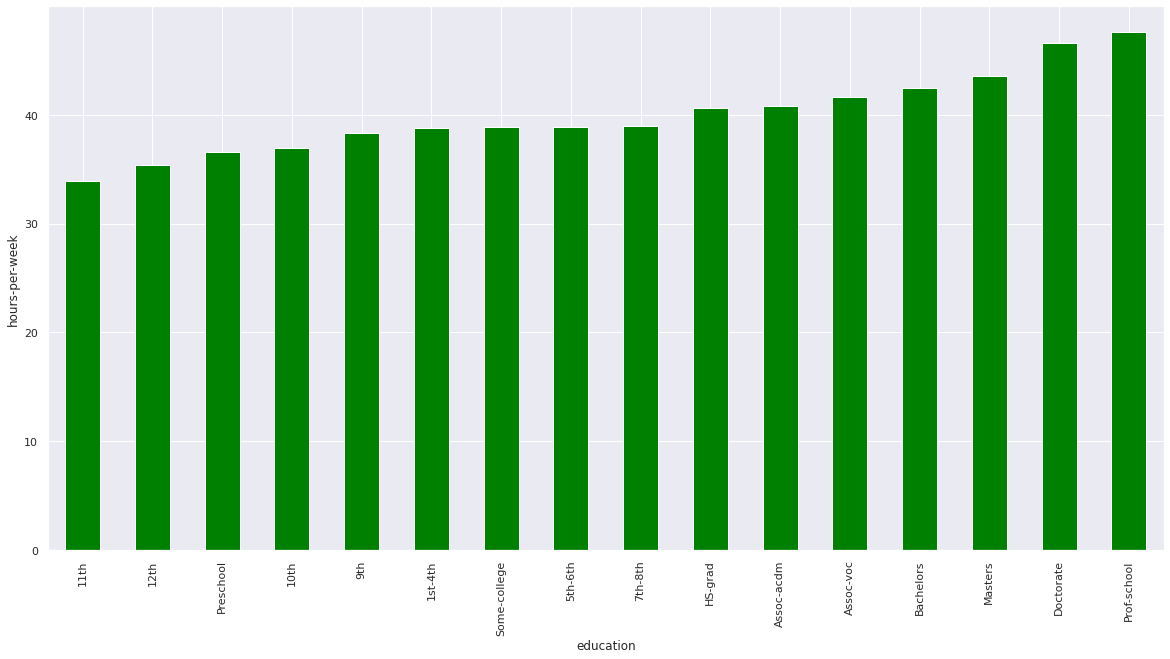

In [42]:
plt.figure(figsize=(20, 10))  # увеличим размер картинки
df.groupby('education')['hours-per-week'].mean().sort_values().plot(kind='bar', colormap='ocean')  # mean of the task. Looks good, but the information is incomplete
plt.ylabel('hours-per-week')  # добавляем подпись на оси Оу
plt.show()

In [ ]:
# sns.catplot(y='hours-per-week', hue='education', col='education', data=df, kind="count", height=10, aspect=2, col_wrap=1);   работает, но не так, как хотелось бы

# **Визуализируйте распределение заработков (группы > 50K и < 50K) по странам. Какой вывод можно сделать?**

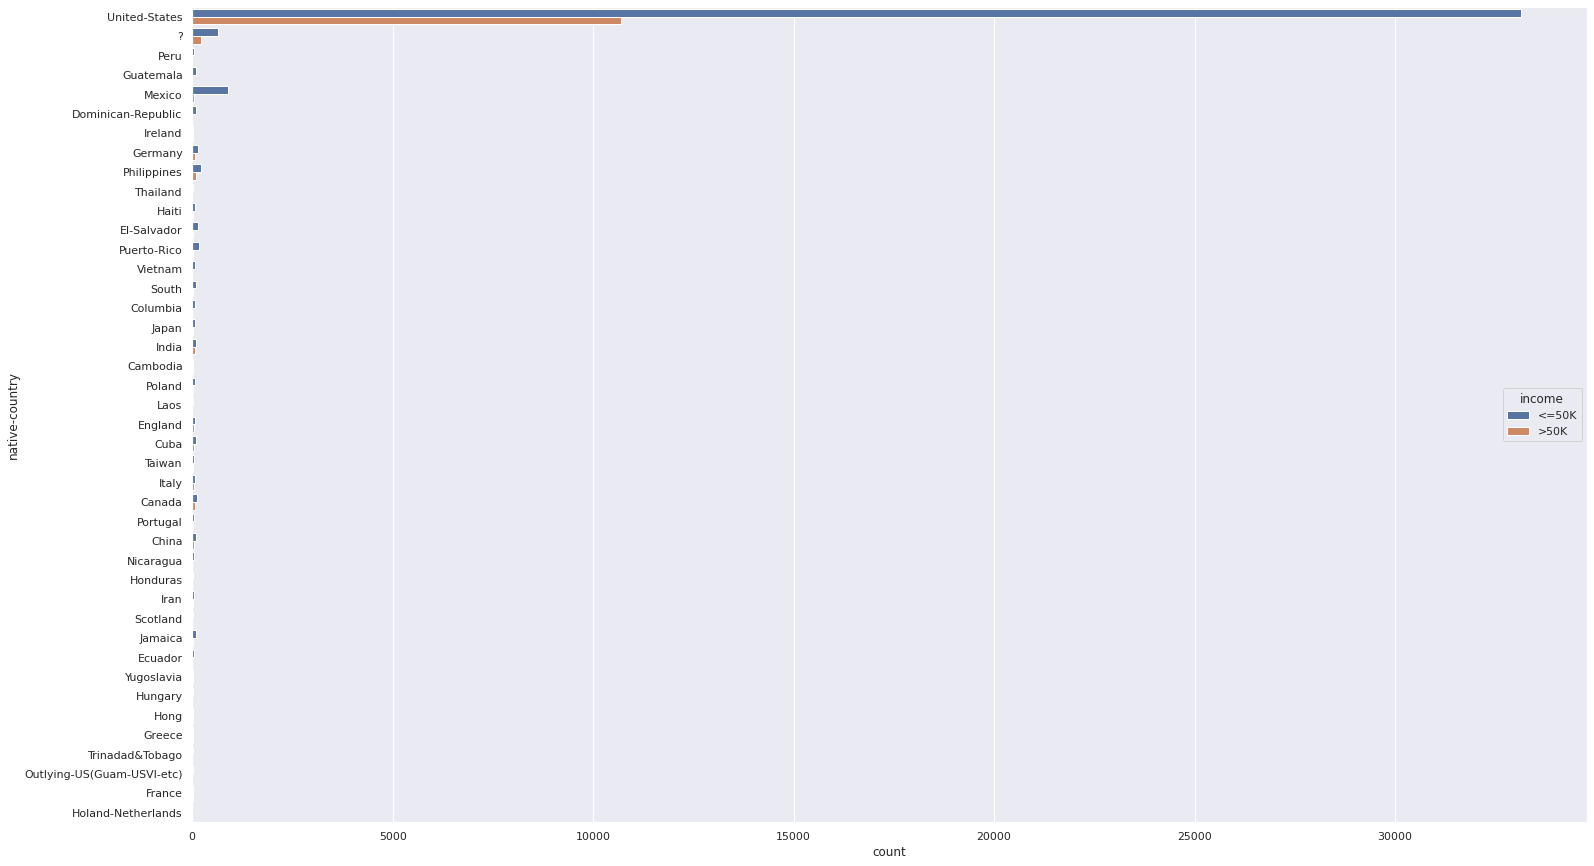

In [43]:
# Your code
plt.figure(figsize=(25, 15))  # увеличим размер картинки
sns.countplot(y='native-country', hue='income', data=df)
plt.show()

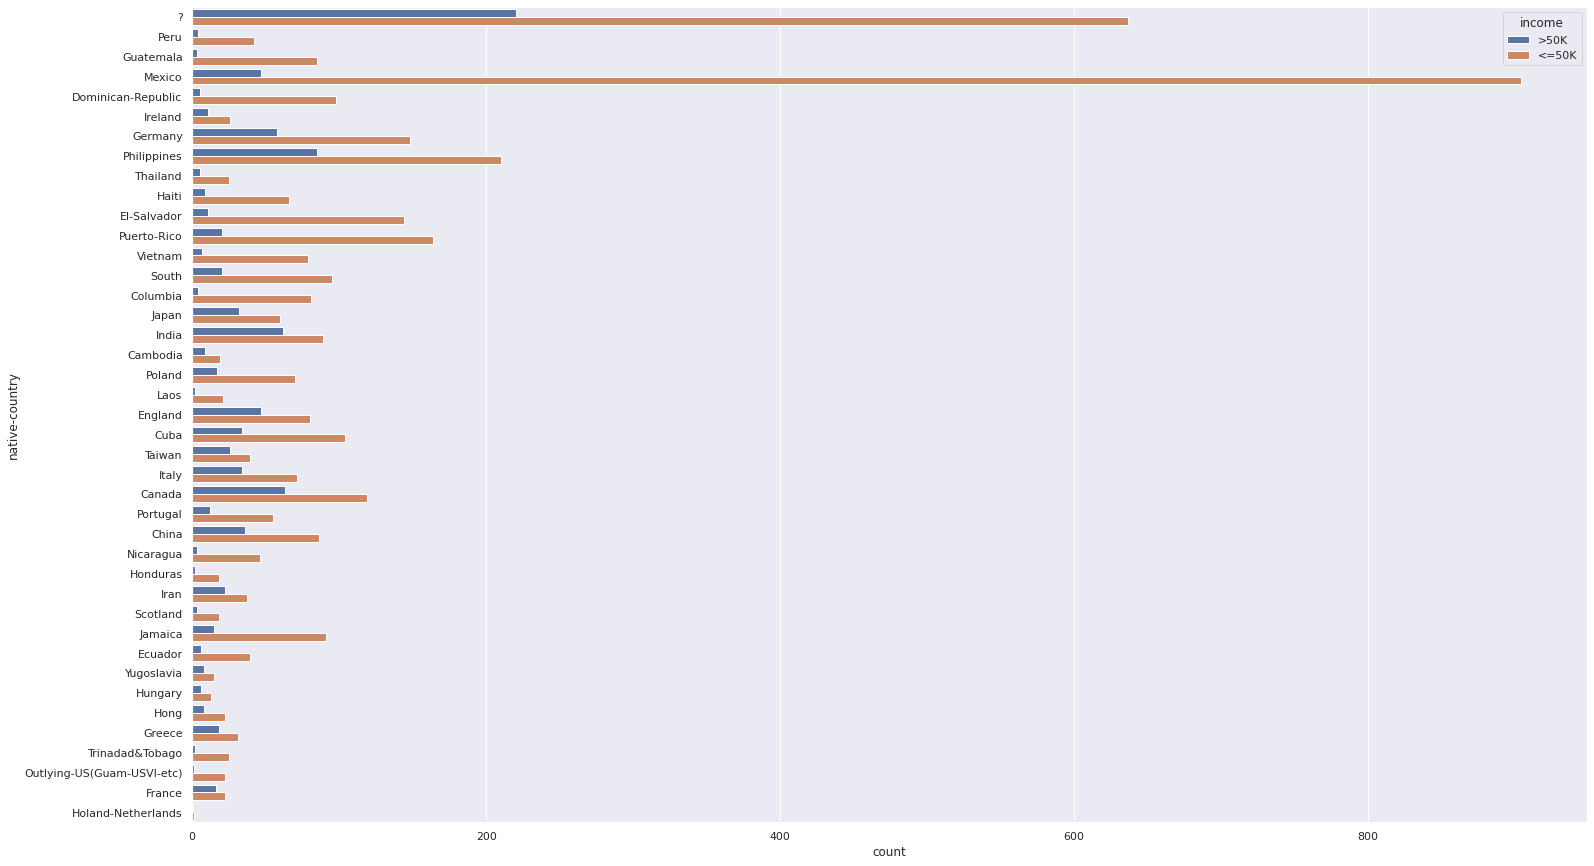

In [44]:
plt.figure(figsize=(25, 15))  # увеличим размер картинки
sns.countplot(y='native-country', hue='income', data=df.loc[(df['native-country'] != "United-States")])
plt.show()

In [45]:
print(pd.crosstab(df['income'], df['native-country']))

native-country    ?  Cambodia  Canada  China  Columbia  Cuba  \
income                                                         
<=50K           637        19     119     86        81   104   
>50K            220         9      63     36         4    34   

native-country  Dominican-Republic  Ecuador  El-Salvador  England  France  \
income                                                                      
<=50K                           98       39          144       80      22   
>50K                             5        6           11       47      16   

native-country  Germany  Greece  Guatemala  Haiti  Holand-Netherlands  \
income                                                                  
<=50K               148      31         85     66                   1   
>50K                 58      18          3      9                   0   

native-country  Honduras  Hong  Hungary  India  Iran  Ireland  Italy  Jamaica  \
income                                                      

* Из графика и таблицы выше можно заметить, что в США больше всего людей, зарабатывающих как больше 50К, так и меньше. 
* Вторая по кол-ву заработка (больше 50К) идет страна "?". Скорее всего это связано с тем, что в датасете люди при опросе не указывали свои страны.
* Предположительно так, к сожалению, сделало большое кол-во людей, поэтому и получили такую статистику. 
* Исключая неизвестную "страну", можно выделить страны, где люди зарабатывают больше 50К: Филиппины, Канада, Индия, Германия, Англия, Мексика, Китай.
* Страны, где люди зарабатывают меньше 50К: Мексика, Филиппины, Пуэрто-Рико, Германия, Канада, Ямайка.

# **Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.**

Проверим зависимость заработка от места работы.

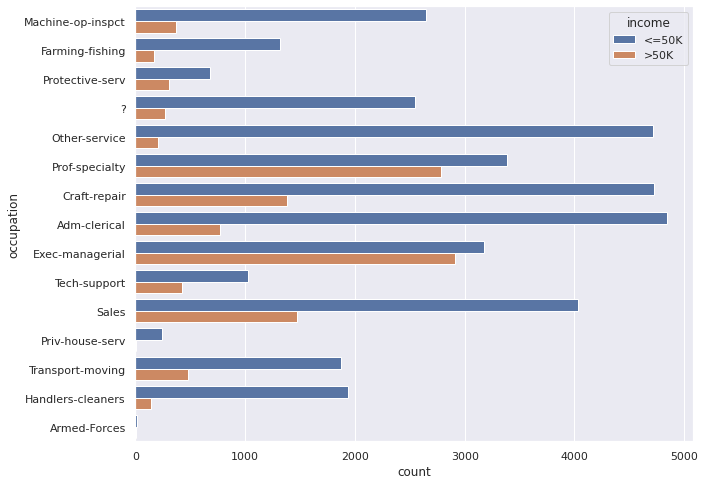

In [46]:
# Your code
sns.countplot(y='occupation', hue='income', data=df)

In [47]:
print(pd.crosstab(df['income'], df['occupation']))

occupation     ?  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
income                                                                        
<=50K       2544          4843            10          4729             3178   
>50K         265           768             5          1383             2908   

occupation  Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
income                                                              
<=50K                  1317               1934               2650   
>50K                    173                138                372   

occupation  Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
income                                                                        
<=50K                4719              239            3388              675   
>50K                  204                3            2784              308   

occupation  Sales  Tech-support  Transport-moving  
income                               

In [48]:
print(df['occupation'].value_counts())

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


* Видно, что из группы "зарабатывают больше 50К" выделяется  Exec-managerial, Prof-specialty. 
* В группе "меньше 50К" - Adm-clerical, Craft-repair, Other-service, Sales.

Так же на графике выше не было видно статистики по армии. Поэтому проверим как люди зарабатывают в армии :)

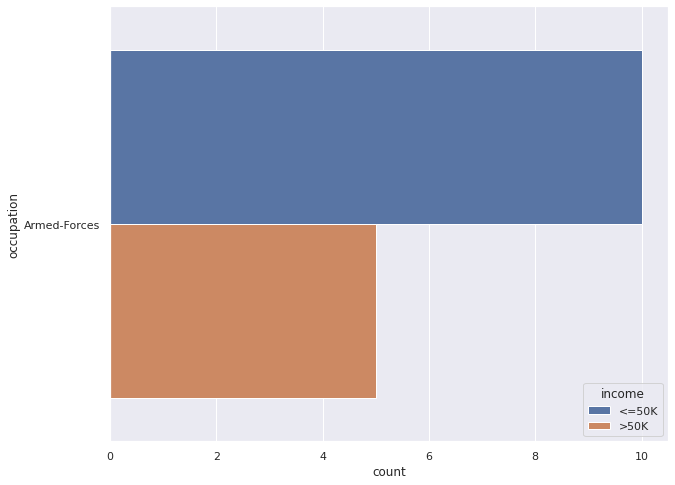

In [49]:
sns.countplot(y='occupation', hue='income', data=df.loc[(df['occupation'] == "Armed-Forces")])

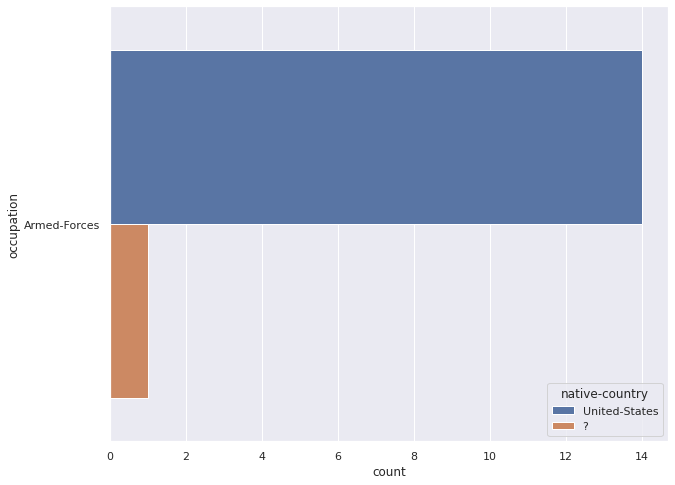

In [50]:
sns.countplot(y='occupation', hue='native-country', data=df.loc[(df['occupation'] == "Armed-Forces")])

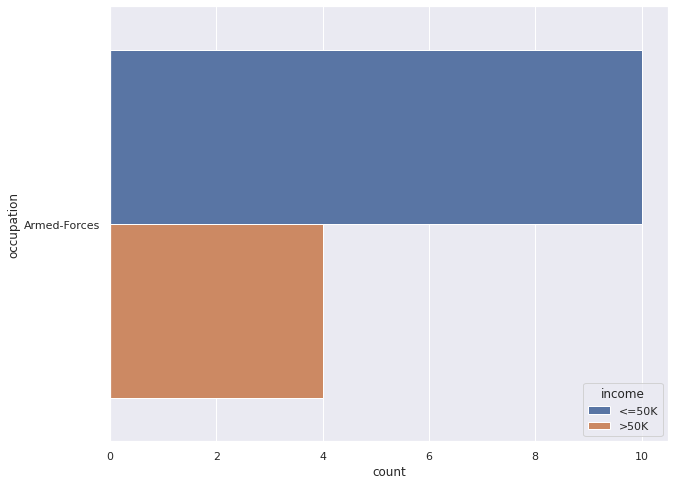

In [51]:
sns.countplot(y='occupation', hue='income', data=df.loc[(df['occupation'] == "Armed-Forces") & (df['native-country'] =="United-States")])

* Исходя из полученной информации - в датасете 15 человек служат в армии. 
* 14 из них служат в США, один не указал свою страну. 
* В армии США 10 человек зарабатывают меньше 50К, а 4 - больше 50К.

Проверим кто зарабатывает больше - мужчины или женщины и в каких сферах работы.

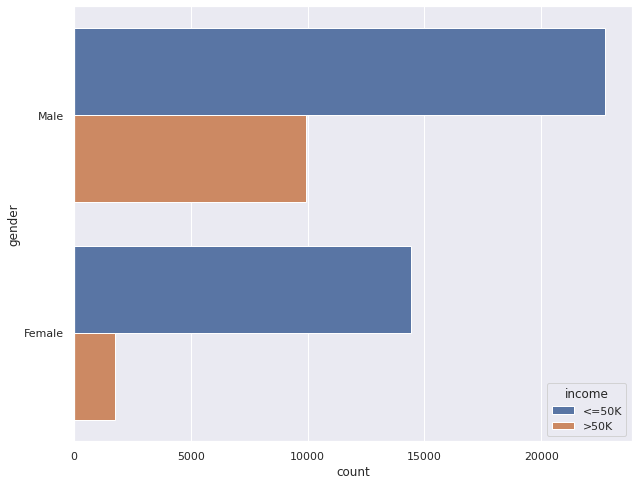

In [52]:
sns.countplot(y='gender', hue='income', data=df)

In [53]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

В статистике видим, что мужчины зарабатывают больше, так как их почти вдвое больше. Проверим же сферу работы.

Text(0.5, 1.0, 'Male')

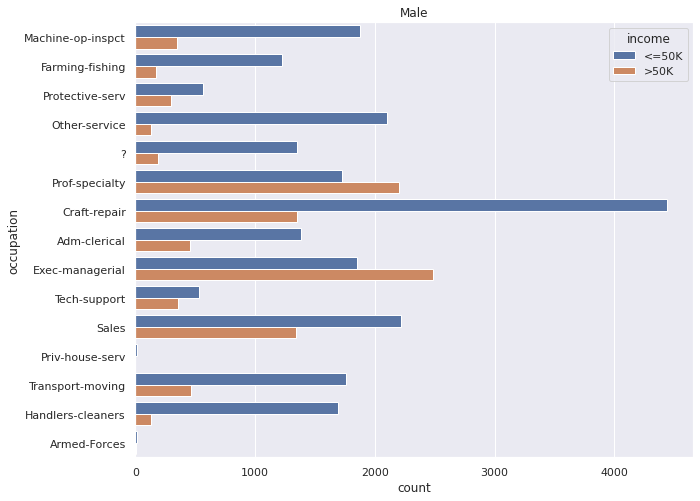

In [54]:
sns.countplot(y='occupation', hue='income', data=df.loc[(df['gender'] == "Male")])
plt.title('Male')

Text(0.5, 1.0, 'Female')

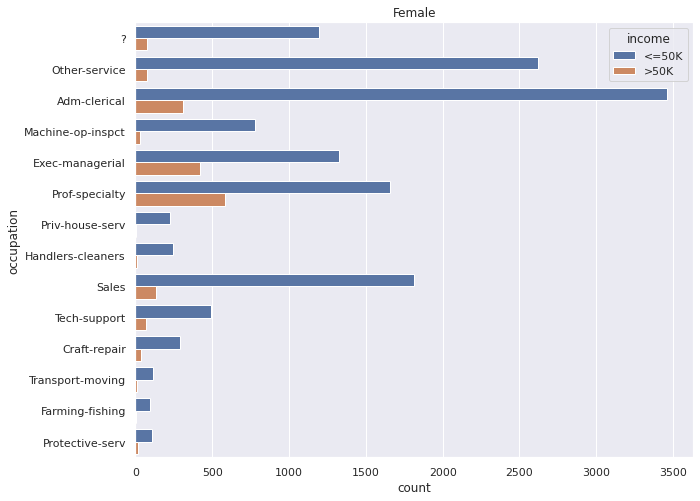

In [55]:
sns.countplot(y='occupation', hue='income', data=df.loc[(df['gender'] == "Female")])
plt.title('Female')

In [56]:
print(pd.crosstab(df['gender'], df['occupation']))

occupation     ?  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
gender                                                                        
Female      1273          3769             0           323             1748   
Male        1536          1842            15          5789             4338   

occupation  Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
gender                                                              
Female                   95                254                804   
Male                   1395               1818               2218   

occupation  Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
gender                                                                        
Female               2698              228            2242              122   
Male                 2225               14            3930              861   

occupation  Sales  Tech-support  Transport-moving  
gender                               

In [57]:
pd.crosstab(df['occupation'], (df.loc[(df['income'] == ">50K"), 'gender'])).T

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
gender,,,,,,,,,,,,,,,
Female,75,309,0,33,421,3,8,28,78,3,582,15,134,67,13
Male,190,459,5,1350,2487,170,130,344,126,0,2202,293,1341,353,468


In [58]:
pd.crosstab(df['occupation'], (df.loc[(df['income'] == "<=50K"), 'gender'])).T

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
gender,,,,,,,,,,,,,,,
Female,1198,3460,0,290,1327,92,246,776,2620,225,1660,107,1813,495,114
Male,1346,1383,10,4439,1851,1225,1688,1874,2099,14,1728,568,2216,531,1760


**Узнать: как можно еще сделать по другому выборку.**

Из полученных результатов можно сказать, что женщины больше в сфере "Priv-house-serv" с зарплотой больше 50К.
При запрлате меньше 50К женщин больше в "Adm-clerica" - почти в 2.5 раз больше чем мужчин. Так же женщин больше в "Other-service" и "Priv-house-serv".

# **=========================================================================**